In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

import keras
from keras.models import load_model

from utility import clean_data, plot_images
import math

#from vis.visualization import visualize_saliency, overlay
#from keras.utils import utils
from keras import activations
from keras.models import load_model

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
classes = ['transverse','longitudinal', 'crocodile','normal']

In [8]:
def plot_confusion_matrix(y_true,y_pred,classes,
                         normalize=False,
                         titile=None,
                         cmap=plt.cm.Blues):
    title = 0
    if not title:
        if normalize:
            title = 'Normalized confusion matirx'
        else:
            title = 'Confusion matrixe, witout normalization'
        
        cm = confusion_matrix(y_true,y_pred)
        
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matirx")
        else:
            print('Cnfusion matrix, without normalization')
        
        print(cm)
        
        fig, ax = plt.subplots()
        im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
        ax.figure.colorbar(im, ax=ax)
        # We want to show all ticks...
        ax.set(xticks=np.arange(cm.shape[1]),
               yticks=np.arange(cm.shape[0]),
               # ... and label them with the respective list entries
               xticklabels=classes, yticklabels=classes,
               title=title,
               ylabel='True label',
               xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
                 rotation_mode="anchor")

        # Loop over data dimensions and create text annotations.
        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.
        for i in range(cm.shape[0]):
            for j in range(cm.shape[1]):
                ax.text(j, i, format(cm[i, j], fmt),
                        ha="center", va="center",
                        color="white" if cm[i, j] > thresh else "black")
        fig.tight_layout()
        return ax

In [52]:
train_data = clean_data('train2.csv')
train = train_data.feature.reshape((-1, 80, 80, 1))/255
train_x = train[:-400]
train_label = train_data.label[:-400]
train_onehot = train_data.onehot[:-400]
test_data = clean_data('test.csv')
test = test_data.feature.reshape((-1, 80, 80, 1))/255
test_x = test[0:]
test_label = test_data.label[0:]
test_onehot = test_data.onehot[0:]

#test_x = train[-400:]
#test_label = train_data.label[-400:]
#test_onehot = train_data.onehot[-400:]

In [87]:
cnn = tf.keras.models.load_model('cnn.h5')
dnn = tf.keras.models.load_model('dnn2.h5')

In [54]:
cnn.graph = tf.get_default_graph()

In [55]:
cnn_predict = cnn.predict(test_x)
cnn_cls = np.argmax(cnn_predict,axis=1)
cnn_cls+=1

In [88]:
dnn_predict = dnn.predict(test_x)
dnn_cls = np.argmax(dnn_predict,axis=1)
dnn_cls+=1

In [57]:
confusion_matrix(test_label,cnn_cls)

array([[ 80,   7,   1,   0],
       [  0, 112,   0,   0],
       [  0,   9, 103,   0],
       [  0,  86,   0,  21]], dtype=int64)

Cnfusion matrix, without normalization
[[ 80   7   1   0]
 [  0 112   0   0]
 [  0   9 103   0]
 [  0  86   0  21]]


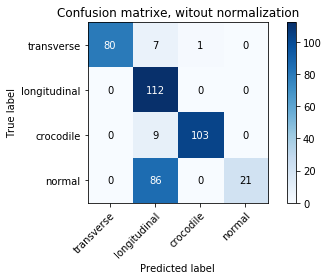

In [58]:
plot_confusion_matrix(test_label,cnn_cls,classes)

Cnfusion matrix, without normalization
[[ 0  0 86  2]
 [ 0 13 94  5]
 [ 0  6 86 20]
 [ 0  0 50 57]]


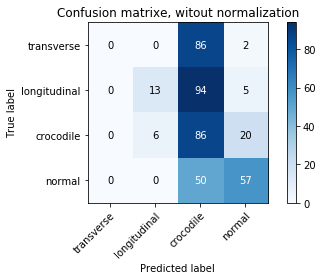

In [89]:
plot_confusion_matrix(test_label,dnn_cls,classes)

In [90]:
dnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 80, 80, 1)         0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 265)               1696265   
_________________________________________________________________
batch_normalization_v1_24 (B (None, 265)               1060      
_________________________________________________________________
activation_24 (Activation)   (None, 265)               0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 265)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               136192    
__________

In [22]:
true_cls = pd.Series(test_label, name='true_cls')[test_label!=cnn_cls]
wrong_cls = pd.Series(cnn_cls, name='wrong_cls')[test_label!=cnn_cls]

In [23]:
wrong = pd.concat([true_cls, wrong_cls], axis = 1)

In [24]:
normal_neu = wrong[wrong['true_cls']==4][wrong['wrong_cls']==6].index.tolist()

C:\Users\石艺兰\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [25]:
sample = normal_neu[0:9]

In [26]:
wrong_cls

1      2
4      2
10     2
19     2
20     2
21     2
23     2
27     2
29     2
35     2
40     2
41     2
45     2
49     2
58     2
64     2
67     2
70     2
74     2
79     2
83     2
87     2
89     2
90     2
93     2
104    2
105    2
108    2
109    2
110    2
      ..
278    2
289    2
291    2
293    2
301    2
302    2
304    2
306    2
307    2
308    2
310    2
314    2
315    2
318    2
323    2
339    2
341    2
346    2
347    2
350    2
351    2
353    2
364    2
367    2
371    2
374    2
377    2
379    3
390    2
398    2
Name: wrong_cls, Length: 103, dtype: int64

# 热度图

In [27]:
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 80, 80, 1)         0         
_________________________________________________________________
layer_conv1 (Conv2D)         (None, 80, 80, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 40, 40, 16)        64        
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 40, 16)        0         
_________________________________________________________________
layer_conv2 (Conv2D)         (None, 40, 40, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 32)        0         
__________

In [28]:
layer_input = cnn.layers[0]
layer_conv1 = cnn.layers[1]
layer_conv2 = cnn.layers[5]
layer_conv3 = cnn.layers[9]
conv_layers = [layer_conv1, layer_conv2, layer_conv3]

In [29]:
layer_conv1.get_weights()[0].shape

(5, 5, 1, 16)

In [30]:
def plot_conv_weights(weights, input_channel=0):
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(weights)
    w_max = np.max(weights)

    # Number of filters used in the conv. layer.
    num_filters = weights.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(4,4)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # See new_conv_layer() for details on the format
            # of this 4-dim tensor.
            img = weights[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

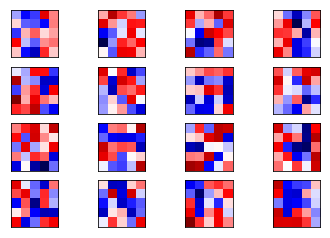

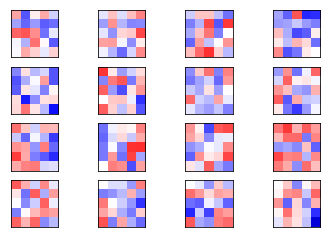

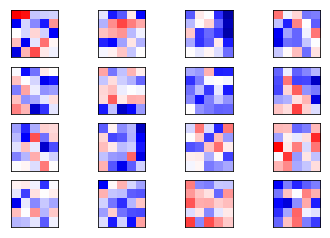

In [31]:
for conv_layer in conv_layers:
    plot_conv_weights(conv_layer.get_weights()[0])

# 分析layer

In [32]:
def plot_conv_output(values):
    # Number of filters used in the conv. layer.
    num_filters = values.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(4, 4)

    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):
        # Only plot the images for valid filters.
        if i<num_filters:
            # Get the output image of using the i'th filter.
            img = values[0, :, :, i]

            # Plot image.
            ax.imshow(img, interpolation='nearest', cmap='Blues')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

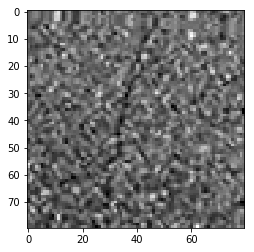

In [33]:
from keras import backend as K
image = test_x[0]

plt.imshow(image.reshape(80,80), cmap='gray')

In [34]:
output_conv1 = K.function(inputs=[layer_input.input],
                          outputs=[layer_conv1.output])
output_conv2 = K.function(inputs=[layer_input.input],
                          outputs=[layer_conv2.output])
output_conv3 = K.function(inputs=[layer_input.input],
                          outputs=[layer_conv3.output])

In [35]:
sess=tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

In [36]:
with tf.Session() as sess:
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    init = tf.global_variables_initializer()

    sess.run(init)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.


In [37]:
with tf.Session() as sess:
    
    coord = tf.train.Coordinator()
    threads = tf.train.start_queue_runners(sess=sess, coord=coord)
    init = tf.global_variables_initializer()

    sess.run(init)

layer_output1 = output_conv1([[image]])[0]
layer_output2 = output_conv2([[image]])[0]
layer_output3 = output_conv3([[image]])[0]

FailedPreconditionError: Error while reading resource variable layer_conv1_3/kernel from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/layer_conv1_3/kernel/class tensorflow::Var does not exist.
	 [[{{node layer_conv1_3/Conv2D/ReadVariableOp}}]]

filter

In [38]:
def _filter(layer_conv):
    result = []
    layer_output = layer_conv.output
    for filter_index in range(16):
        loss = K.mean(layer_output[:, :, :, filter_index])
        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, layer_input.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([layer_input.input], [loss, grads])
        input_img_data = np.random.random((1, 80, 80, 1)) * 20 + 128.
        # run gradient ascent for 20 steps
        for i in range(500):
            loss_value, grads_value = iterate([input_img_data])
            input_img_data += grads_value * 0.1
        result.append(input_img_data.reshape(80,80))
        
    return result

In [39]:
def plot_filter(layer_conv):
     # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(4, 4)
    img = _filter(layer_conv)
    # Plot the output images of all the filters.
    for i, ax in enumerate(axes.flat):

        ax.imshow(img[i], interpolation='nearest', cmap='Blues')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

FailedPreconditionError: Error while reading resource variable layer_conv1_3/bias from Container: localhost. This could mean that the variable was uninitialized. Not found: Resource localhost/layer_conv1_3/bias/class tensorflow::Var does not exist.
	 [[{{node layer_conv1_3/BiasAdd/ReadVariableOp}}]]

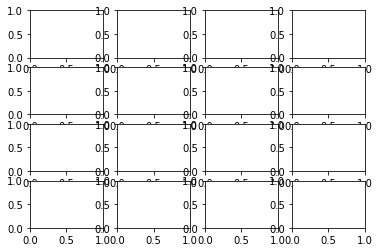

In [40]:
plot_filter(layer_conv1)